In [0]:
from keras.datasets import mnist
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from keras.utils import np_utils

import cv2
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
#image generaion for given number 
X = []
for i in range(len(y_train)):
    if y_train[i] == 3:
        X.append(x_train[i])

In [5]:
len(X)

6131

In [0]:
X= np.array(X)

In [0]:
X = np.reshape(X, (1, len(X), 28, 28))

In [0]:
X_train=[]
Y_train =[]

#as row by row and pixel by pixel approach
for it in range(X.shape[1]):
    for i in range(1,X.shape[2] -1):
        for j in range(1,X.shape[3] -1):
            X_train.append([X[0][it][i-1][j-1], X[0][it][i-1][j], X[0][it][i-1][j+1]])
            Y_train.append(X[0][it][i][j])

In [9]:
X.shape[1]*(X.shape[2]-2)*(X.shape[3] -2)

4144556

In [0]:
X_train = np.reshape(X_train,(((X.shape[1])*(X.shape[2]-2)*(X.shape[3]-2)),1,3))

In [0]:
Y_train = np.array(Y_train)

In [0]:
Y_train = np.reshape(Y_train,(((X.shape[1])*(X.shape[2]-2)*(X.shape[3]-2)),1))

In [13]:
X_train.shape, Y_train.shape #problem look here

((4144556, 1, 3), (4144556, 1))

In [0]:
Y_train = np_utils.to_categorical(Y_train)

In [15]:
Y_train.shape

(4144556, 256)

In [0]:
model = Sequential()
model.add(LSTM(256, input_shape=(X_train.shape[1],X_train.shape[2])))
#model.add(LSTM(128, activation='softmax'))
#model.add(Dropout(0.2))
model.add(Dense(256, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, epochs=4, batch_size = 32768)#this should work


Epoch 1/4
2097152/4144556 [==============>...............] - ETA: 2:34 - loss: 4.8769 - acc: 0.7660

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               266240    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
Total params: 332,032
Trainable params: 332,032
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.save("mp_3.h5")

In [0]:
unique, counts = np.unique(X_train, return_counts=True)

In [0]:
d = dict(zip(unique, counts))

In [26]:
d[0]/(sum(d[i] for i in range(0,256)))

0.7899274006570643

In [0]:
X_test = []
Y_test = []
for i in range(1,27):
    for j in range(1,27):
        X_test.append([X[0][0][i-1][j-1], X[0][0][i-1][j], X[0][0][i-1][j+1]])
  

In [1]:
from keras.models import load_model
test_model = load_model('mp_3.h5')

Using TensorFlow backend.


OSError: ignored

In [0]:
X_test = np.reshape(X_test,(len(X_test), 1, 3))

In [0]:
prediction = test_model.predict(X_test)

In [57]:
prediction

array([[9.7776049e-01, 2.1709326e-04, 2.9674260e-04, ..., 6.2979979e-04,
        1.3829813e-03, 1.2588369e-03],
       [9.7776049e-01, 2.1709326e-04, 2.9674260e-04, ..., 6.2979979e-04,
        1.3829813e-03, 1.2588369e-03],
       [9.7776049e-01, 2.1709326e-04, 2.9674260e-04, ..., 6.2979979e-04,
        1.3829813e-03, 1.2588369e-03],
       ...,
       [9.7776049e-01, 2.1709326e-04, 2.9674260e-04, ..., 6.2979979e-04,
        1.3829813e-03, 1.2588369e-03],
       [9.7776049e-01, 2.1709326e-04, 2.9674260e-04, ..., 6.2979979e-04,
        1.3829813e-03, 1.2588369e-03],
       [9.7776049e-01, 2.1709326e-04, 2.9674260e-04, ..., 6.2979979e-04,
        1.3829813e-03, 1.2588369e-03]], dtype=float32)

In [52]:
list(prediction[0]).index(max(prediction[0]))

0

In [0]:
Y_test = []
for i in range(prediction.shape[0]):
  v = list(prediction[i]).index(max(prediction[i]))
  Y_test.append(v)

In [0]:
unique, count = np.unique(np.array(Y_test),return_counts = True )

In [77]:
dict(zip(unique, count))

{0: 598, 253: 74, 254: 1, 255: 3}

In [0]:
Y_test = np.reshape(Y_test,(26, 26))

In [0]:
np.save("mp.npy",Y_test)

In [82]:
!ls

mp.h5  mp.npy  sample_data


In [1]:
!ls

mp.h5  mp.npy  sample_data


In [0]:
import matplotlib.pyplot as plt

In [0]:
import numpy as np
mp = np.load("mp.npy")

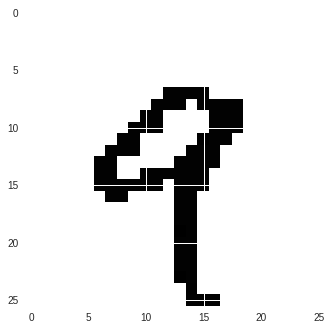

In [30]:
plt.imshow(mp)